In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [117]:
df_stock = fdr.StockListing('KRX') #NYSE
df_stock.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,86000,1,2100,2.50,84900,86100,84700,17734621,1516088009450,509088861292000,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,359750,1,12250,3.53,351000,362000,351000,2258958,806261729750,261898850808750,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,347500,3,0,0.00,349000,351000,341000,115148,39821175750,81315000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1001000,1,4000,0.40,999000,1012000,999000,51768,52077542000,71245174000000,71174000,STK
4,012450,KR7012450003,한화에어로스페이스,KOSPI,,1093000,2,-14000,-1.26,1100000,1113000,1081000,122445,134012509500,56358797293000,51563401,STK


In [118]:
filt = df_stock['Name'].str.contains('삼성전자')
df_stock[filt]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,86000,1,2100,2.50,84900,86100,84700,17734621,1516088009450,509088861292000,5919637922,STK
5,005935,KR7005931001,삼성전자우,KOSPI,,67900,1,1500,2.26,67000,68000,66800,1842935,124403384150,55404679685600,815974664,STK


In [119]:
code='005930'
df = fdr.DataReader(code, '2024-01-01')
df.shape

(428, 6)

In [120]:
df.index[0]

Timestamp('2024-01-02 00:00:00')

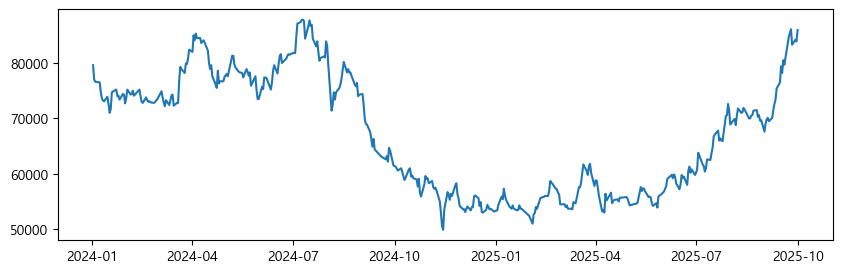

In [121]:
plt.figure(figsize=(10,3))
plt.plot(df.index, df['Close'])
plt.show()

In [122]:
df['년'] = df.index.year
df['월'] = df.index.month
df['일'] = df.index.day
df

,Open,High,Low,Close,Volume,Change,년,월,일
Date,,,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,2024,1,2
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,2024,1,3
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,2024,1,4
2024-01-05,76700,77100,76400,76600,11304316,0.000000,2024,1,5
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,2024,1,8
...,...,...,...,...,...,...,...,...,...
2025-09-25,84400,86200,84100,86100,19665151,0.008197,2025,9,25
2025-09-26,85000,85300,82400,83300,24071193,-0.032520,2025,9,26
2025-09-29,83300,85000,83200,84200,13069094,0.010804,2025,9,29


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 428 entries, 2024-01-02 to 2025-10-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    428 non-null    int64  
 1   High    428 non-null    int64  
 2   Low     428 non-null    int64  
 3   Close   428 non-null    int64  
 4   Volume  428 non-null    int64  
 5   Change  428 non-null    float64
 6   년       428 non-null    int32  
 7   월       428 non-null    int32  
 8   일       428 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 28.4 KB


In [124]:
df = df[df['년']==2024]
df.tail()

,Open,High,Low,Close,Volume,Change,년,월,일
Date,,,,,,,,,
2024-12-23,53400,54000,53300,53500,13672650,0.009434,2024,12,23
2024-12-24,53700,54500,53600,54400,11634677,0.016822,2024,12,24
2024-12-26,54500,54600,53500,53600,10517075,-0.014706,2024,12,26
2024-12-27,53500,54100,53200,53700,10747196,0.001866,2024,12,27
2024-12-30,53300,54000,53100,53200,12624702,-0.009311,2024,12,30


In [125]:
group = df.groupby('월')[['Close', 'Volume']].mean()
group['Vol'] = group['Volume']/1000
group

,Close,Volume,Vol
월,,,
1,74454.545455,1.807449e+07,18074.489045
2,73684.210526,1.573450e+07,15734.499158
3,75760.000000,2.241809e+07,22418.086800
4,80595.238095,2.306391e+07,23063.906095
5,77780.000000,2.105444e+07,21054.439100
6,78831.578947,1.852085e+07,18520.854368
7,84382.608696,2.074605e+07,20746.049957
8,76500.000000,1.914334e+07,19143.341714
9,66033.333333,2.870442e+07,28704.417722


In [126]:
df = group.copy()

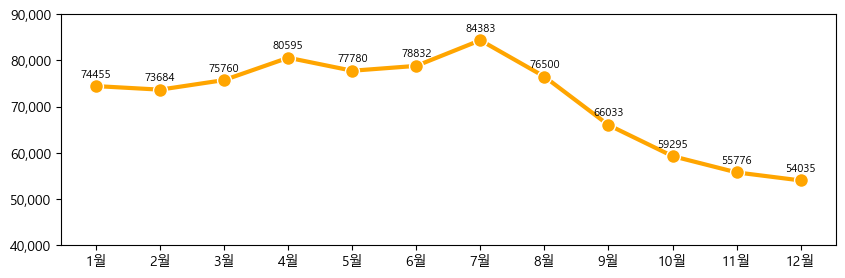

In [ ]:

plt.figure(figsize=(10, 3))
plt.plot(df.index, df['Close'], marker='o', color="orange", lw=3, mec='w', ms=10)
xticks = [x for x in df.index]
plt.xticks(xticks, [f'{x}월' for x in xticks])
ymin = int((df['Close'].min()-5000)/10000)*10000
ymax = int(df['Close'].max()+10000)
yticks = [y for y in range(ymin, ymax, 10000)]
plt.yticks(yticks, [f'{y:,}' for y in yticks])
for idx, close in enumerate(df['Close']):
    plt.text(df.index[idx], close+2000, f'{close:.0f}', ha='center', size=8)
plt.show()

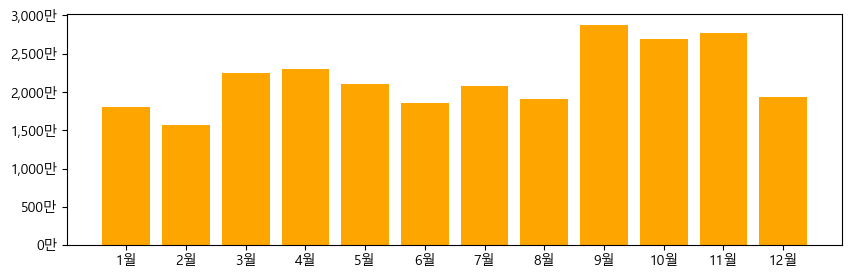

In [128]:
plt.figure(figsize=(10, 3))
plt.bar(df.index, df['Volume']/10000, color='orange')
xticks = [x for x in df.index]
plt.xticks(xticks, [f'{x}월' for x in xticks])
ymax = int(df['Volume'].max()/10000)
yticks =[y for y in range(0, ymax+500, 500)]
plt.yticks(yticks, [f'{y:,}만' for y in yticks])
plt.show()

In [129]:
#시계열 ARIMA

In [130]:
code ='005930'
ss = fdr.DataReader(code, '2020-01-01', '2021-08-30')
ss.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-24,73900,75700,73900,75600,21016913,0.031378
2021-08-25,76200,76600,74900,75700,22319664,0.001323
2021-08-26,76100,76200,74600,74600,16671494,-0.014531
2021-08-27,74300,75000,73800,74300,15172748,-0.004021
2021-08-30,75400,75500,74200,74600,12686999,0.004038


In [131]:
n_train = int(len(ss) * 0.7)

len(ss), n_train

(413, 289)

In [132]:
y_train = ss['Close'][:n_train]
y_test = ss['Close'][n_train:]

In [133]:
len(y_train), len(y_test)

(289, 124)

In [134]:
y_train[:5], y_test[:5]

(Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
 Name: Close, dtype: int64,
 Date
 2021-03-05    82100
 2021-03-08    82000
 2021-03-09    81400
 2021-03-10    80900
 2021-03-11    82000
 Name: Close, dtype: int64)

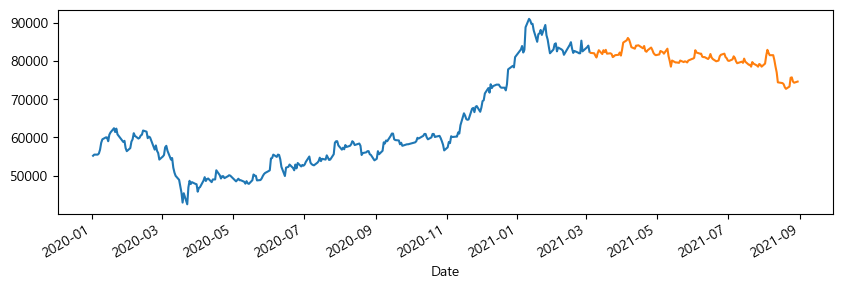

In [135]:
plt.figure(figsize=(10, 3))
y_train.plot()
y_test.plot()
plt.show()

In [136]:
from pmdarima.arima import ndiffs
ndif = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
ndif

1

In [137]:
import pmdarima as pm
model = pm.auto_arima(
    y_train, d=1, start_p=0, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4934.821, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4936.780, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4936.799, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4934.428, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4938.798, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.115 seconds


In [138]:
model.fit(y_train)

,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [139]:
y_pred = model.predict(n_periods=len(y_test))
y_pred

289    82400.0
290    82400.0
291    82400.0
292    82400.0
293    82400.0
        ...   
408    82400.0
409    82400.0
410    82400.0
411    82400.0
412    82400.0
Length: 124, dtype: float64

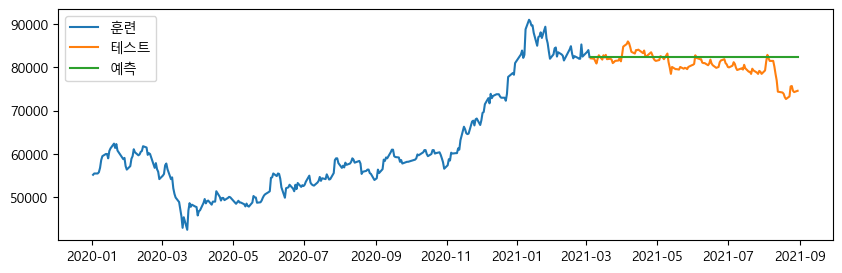

In [140]:
plt.figure(figsize=(10, 3))
plt.plot(y_train, label='훈련')
plt.plot(y_test, label='테스트')
plt.plot(y_test.index, y_pred, label='예측')
plt.legend()
plt.show()

In [141]:
def one_step():
    pred, conf_int = model.predict(n_periods=1, return_conf_int=True)
    #print('예측:', pred.tolist()[0])
    #print('예측 하안, 상한:', conf_int[0])
    return pred.tolist()[0], conf_int[0]

In [142]:
y_pred=[]
y_lower=[]
y_upper=[]
for test in y_test:
    pred, conf = one_step()
    y_pred.append(pred)
    y_lower.append(conf[0])
    y_upper.append(conf[1])
    #print(pred)
    model.update(test)

In [143]:
y_test.index

DatetimeIndex(['2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=124, freq=None)

In [144]:
import pandas as pd
pred = pd.Series(y_pred, index=y_test.index)
lower = pd.Series(y_lower, index=y_test.index)
upper = pd.Series(y_upper, index=y_test.index)

In [145]:
data = {'예측':y_pred, '하안':y_lower, '상한':y_upper}

In [146]:
df = pd.DataFrame(data, index=y_test.index)
df['실제'] = y_test
df

,예측,하안,상한,실제
Date,,,,
2021-03-05,82400.0,79921.289051,84878.710949,82100
2021-03-08,82100.0,79621.289051,84578.710949,82000
2021-03-09,82000.0,79521.289051,84478.710949,81400
2021-03-10,81400.0,78921.289051,83878.710949,80900
2021-03-11,80900.0,78421.289051,83378.710949,82000
...,...,...,...,...
2021-08-24,73300.0,71040.218891,75559.781109,75600
2021-08-25,75600.0,73340.218891,77859.781109,75700
2021-08-26,75700.0,73440.218891,77959.781109,74600


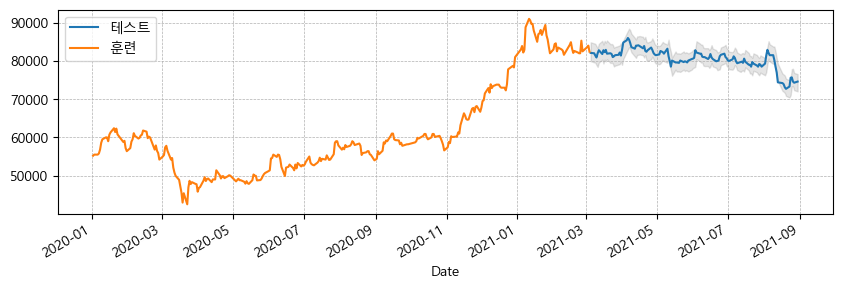

In [147]:
plt.figure(figsize=(10, 3))
y_test.plot(label='테스트')
y_train.plot(label='훈련')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

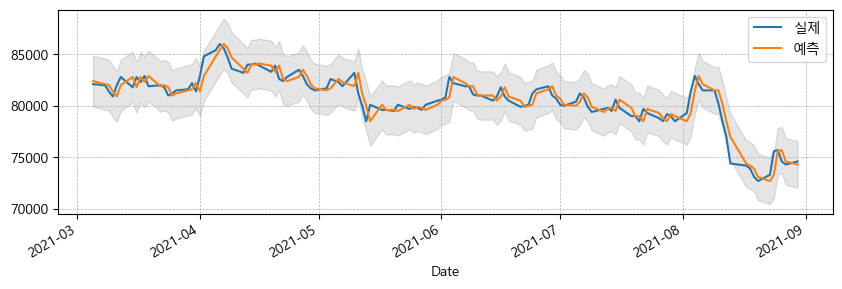

In [148]:
plt.figure(figsize=(10, 3))
y_test.plot(label='실제')
pred.plot(label='예측')
#y_train.plot(label='훈련')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

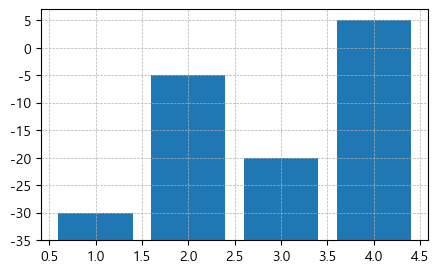

In [20]:
x=[1, 2, 3, 4]
y=[-30, -5, -20, 5]
miny= abs(min(y))+5
maxy= abs(max(y))+miny+5
yticks = [y for y in range(0, maxy, 5)]

plt.figure(figsize=(5, 3))
plt.bar(x, [i + miny for i in y])
plt.yticks(yticks, [y-miny for y in yticks])
plt.grid(True, ls='--', lw=0.5)
plt.show()

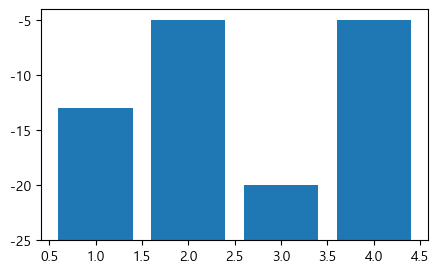

In [35]:
plt.figure(figsize=(5, 3))
x=[1, 2, 3, 4]
y=[-13, -5, -20, -5]
miny=min(y)-5
plt.bar(x, [i-miny for i in y], bottom=miny)
plt.show()

In [42]:
#티커 종목코드 구하기
import FinanceDataReader as fdr
df = fdr.StockListing('KRX')
names=['삼성전자', '카카오', 'NAVER', 'LG전자', '현대차']
filt = df['Name'].isin(names)
df = df[filt][['Code', 'Name']]
names = list(df['Name'])
codes = list(df['Code'])
names, codes

(['삼성전자', '현대차', 'NAVER', '카카오', 'LG전자'],
 ['005930', '005380', '035420', '035720', '066570'])

In [69]:
#1)특정회사의 start ~ end까지 주식데이터
code = '005930'
start = '2025-01-01'
end='2025-09-30'
df = fdr.DataReader(code, start, end)
y_train = df['Close']

In [71]:
#2)모델생성후 학습
import warnings
warnings.filterwarnings('ignore')

import pmdarima as pm
model = pm.auto_arima(
    y_train, d=1, start_p=0, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, trace=False
)
model.fit(y_train)

,order,"(0, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,True


In [ ]:
#4)예측 실행
pred=[]
lower=[]
upper=[]
for y in y_train:
    y_pred, conf = model.predict(n_periods=1, return_conf_int=True)
    pred.append(y_pred.tolist()[0])
    lower.append(conf[0][0])
    upper.append(conf[0][1])
    model.update(y)

In [84]:
#5)결과를 데이터프레임으로 변환
import pandas as pd
df = pd.DataFrame(y_train)
df['예측'] = pred
df['하한'] = lower
df['상한'] = upper
df.head()

,Close,예측,하한,상한
Date,,,,
2025-01-02,53400,83953.126803,79999.248873,87907.004734
2025-01-03,54400,53407.620567,48418.557569,58396.683566
2025-01-06,55900,54407.620567,49418.557569,59396.683566
2025-01-07,55400,55907.620567,50918.557569,60896.683566
2025-01-08,57300,55407.620567,50418.557569,60396.683566


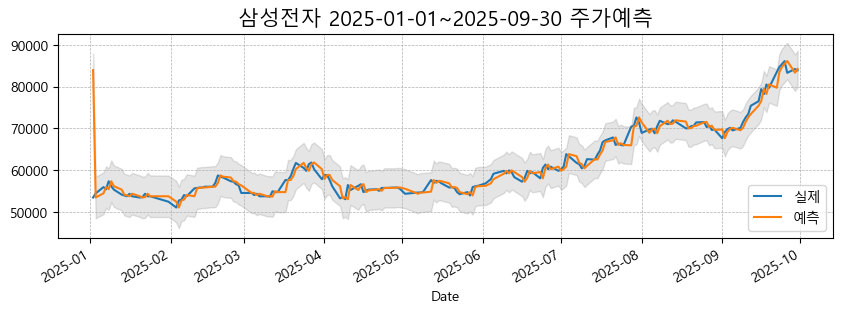

In [85]:
#6)그래프출력
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(10, 3))
df['Close'].plot(label='실제')
df['예측'].plot(label='예측')
plt.fill_between(df.index, df['하한'], df['상한'], color='k', alpha=0.1)
plt.grid(True, ls='--', lw=0.5)
plt.title(f'삼성전자 {start}~{end} 주가예측', size=15)
plt.legend()
plt.show()

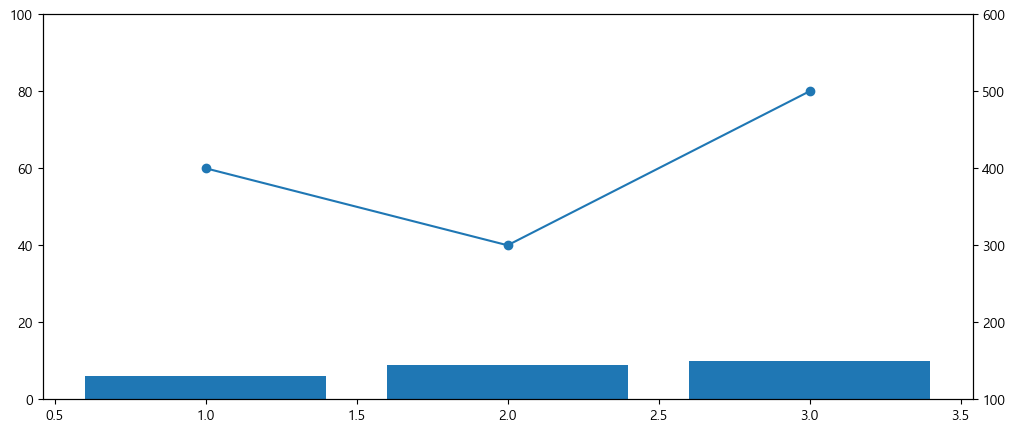

In [95]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar([1, 2, 3], [6, 9, 10])
ax1.set_ylim(0, 100)
ax2 = ax1.twinx()
ax2.plot([1, 2, 3], [400, 300, 500], marker='o')
ax2.set_ylim(100, 600)
plt.show()

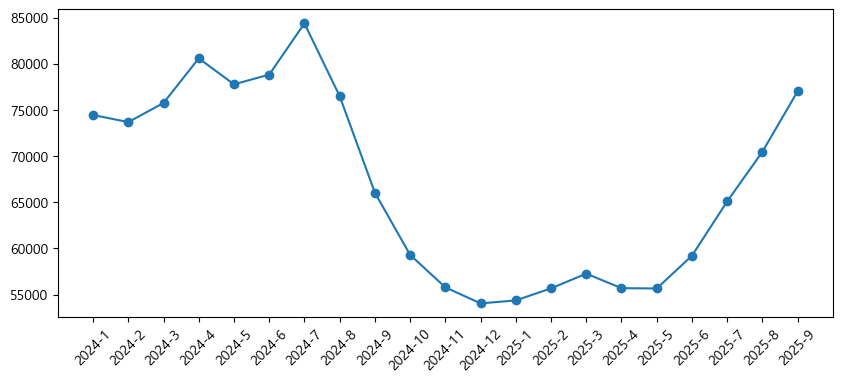

In [137]:
code = '005930'
start = '2024-01-01'
end='2025-09-30'
df = fdr.DataReader(code, start, end)
df['year'] = df.index.year
df['month'] = df.index.month
group = df.groupby(['year','month'])[['Close', 'Volume']].mean()
group.reset_index(inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(group.index, group['Close'], marker='o')
xticks=[x for x in group.index]
plt.xticks(xticks, [f'{group.loc[idx,"year"]}-{group.loc[idx,"month"]}' for idx in xticks], rotation=45)
plt.show()

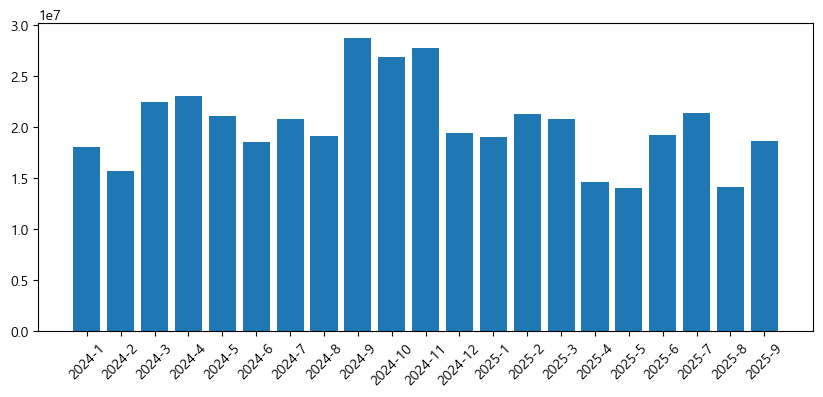

In [139]:
plt.figure(figsize=(10, 4))
plt.bar(group.index, group['Volume'])
xticks=[x for x in group.index]
plt.xticks(xticks, [f'{group.loc[idx,"year"]}-{group.loc[idx,"month"]}' for idx in xticks], rotation=45)
plt.show()